# Task 1: Combine CSV files into a Single DataFrame

In [ ]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/TimesSeries/FinalExams/Beans (dry).csv

[Errno 20] Not a directory: '/content/drive/MyDrive/TimesSeries/FinalExams/Beans (dry).csv'
/content


In [ ]:
ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive/TimesSeries/FinalExams/Cassava.csv

[Errno 20] Not a directory: '/content/drive/MyDrive/TimesSeries/FinalExams/Cassava.csv'
/content


In [ ]:
ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive/TimesSeries/FinalExams/Chili (red).csv

[Errno 20] Not a directory: '/content/drive/MyDrive/TimesSeries/FinalExams/Chili (red).csv'
/content


In [ ]:
%cd /content/drive/MyDrive/TimesSeries/FinalExams/Maize.csv

[Errno 20] Not a directory: '/content/drive/MyDrive/TimesSeries/FinalExams/Maize.csv'
/content


In [ ]:
%cd /content/drive/MyDrive/TimesSeries/FinalExams/Oranges (big size).csv

[Errno 20] Not a directory: '/content/drive/MyDrive/TimesSeries/FinalExams/Oranges (big size).csv'
/content


In [ ]:
%cd /content/drive/MyDrive/TimesSeries/FinalExams/Peas (fresh).csv

[Errno 20] Not a directory: '/content/drive/MyDrive/TimesSeries/FinalExams/Peas (fresh).csv'
/content


In [ ]:
%cd /content/drive/MyDrive/TimesSeries/FinalExams/Potatoes (Irish).csv

[Errno 20] Not a directory: '/content/drive/MyDrive/TimesSeries/FinalExams/Potatoes (Irish).csv'
/content


In [ ]:
%cd /content/drive/MyDrive/TimesSeries/FinalExams/Sorghum.csv

[Errno 20] Not a directory: '/content/drive/MyDrive/TimesSeries/FinalExams/Sorghum.csv'
/content


In [ ]:
%cd /content/drive/MyDrive/TimesSeries/FinalExams/Tomatoes.csv

[Errno 20] Not a directory: '/content/drive/MyDrive/TimesSeries/FinalExams/Tomatoes.csv'
/content


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Path to the directory containing your CSV files
data_path = '/content/drive/MyDrive/TimesSeries/FinalExams/'

# List of CSV file names
csv_files = ['Beans (dry).csv', 'Cassava.csv', 'Chili (red).csv', 'Maize.csv', 'Oranges (big size).csv', 'Peas (fresh).csv', 'Potatoes (Irish).csv', 'Sorghum.csv', 'Tomatoes.csv']

# Dictionary to store DataFrames
dataframes = {}

# Function to create and parse the date column
def parse_date(df):
    df['date'] = pd.to_datetime(df['mp_year'].astype(str) + '-' + df['mp_month'].astype(str) + '-01')
    return df

# Loop through the list and read each file into a DataFrame with date parsing
for file in csv_files:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    if 'mp_year' in df.columns and 'mp_month' in df.columns:
        df = parse_date(df)
        df.set_index('date', inplace=True)
    dataframes[file] = df

# Access individual DataFrames
df1 = dataframes['Beans (dry).csv']
df2 = dataframes['Cassava.csv']
df3 = dataframes['Chili (red).csv']
df4 = dataframes['Maize.csv']
df5 = dataframes['Oranges (big size).csv']
df6 = dataframes['Peas (fresh).csv']
df7 = dataframes['Potatoes (Irish).csv']
df8 = dataframes['Sorghum.csv']
df9 = dataframes['Tomatoes.csv']

# Optional: Verify by displaying the first few rows and the data type of the date column
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(df.head())
    if 'date' in df.columns:
        print(f"Date column data type: {df['date'].dtype}\n")


DataFrame: Beans (dry).csv
            adm0_id adm0_name  adm1_id             adm1_name  mkt_id mkt_name  \
date                                                                            
2010-11-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2010-12-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2011-01-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2011-02-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2011-03-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   

            cm_id      cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  \
date                                                                            
2010-11-01    262  Beans (dry)      77      RWF     15  Retail      5      KG   
2010-12-01    262  Beans (dry)      77      RWF     15  Retail      5      KG   
2011-01-01    262  Beans (dry)      77      RWF     15  Retail      5      KG   


In [ ]:
# prompt: combine all dataframes into one dataframe

# Combine all dataframes into one
combined_df = pd.concat(dataframes.values(), keys=dataframes.keys())

# Display the combined DataFrame
print(combined_df.head())

                            adm0_id adm0_name  adm1_id             adm1_name  \
                date                                                           
Beans (dry).csv 2010-11-01      205    Rwanda    21973  $West/Iburengerazuba   
                2010-12-01      205    Rwanda    21973  $West/Iburengerazuba   
                2011-01-01      205    Rwanda    21973  $West/Iburengerazuba   
                2011-02-01      205    Rwanda    21973  $West/Iburengerazuba   
                2011-03-01      205    Rwanda    21973  $West/Iburengerazuba   

                            mkt_id mkt_name  cm_id      cm_name  cur_id  \
                date                                                      
Beans (dry).csv 2010-11-01    1045  Birambo    262  Beans (dry)      77   
                2010-12-01    1045  Birambo    262  Beans (dry)      77   
                2011-01-01    1045  Birambo    262  Beans (dry)      77   
                2011-02-01    1045  Birambo    262  Beans (dry) 

In [ ]:
# Assuming 'df' is already defined from your previous code

# Check if 'mp_year' and 'mp_month' columns exist
if 'mp_year' in df.columns and 'mp_month' in df.columns:
    # Create a new 'date' column by combining 'mp_year' and 'mp_month'
    df['date'] = pd.to_datetime(df['mp_year'].astype(str) + '-' + df['mp_month'].astype(str) + '-01')
    # Set the 'date' column as the index
    df.set_index('date', inplace=True)
    # Optional: Drop the original 'mp_year' and 'mp_month' columns if no longer needed
    df.drop(columns=['mp_year', 'mp_month'], inplace=True)
    # Print first few rows to verify
    print(df.head())
else:
    print("Error: 'mp_year' or 'mp_month' columns not found in the DataFrame.")

            adm0_id adm0_name  adm1_id             adm1_name  mkt_id mkt_name  \
date                                                                            
2012-01-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2012-02-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2012-03-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2012-04-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2012-05-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   

            cm_id   cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  \
date                                                                         
2012-01-01    114  Tomatoes      77      RWF     15  Retail      5      KG   
2012-02-01    114  Tomatoes      77      RWF     15  Retail      5      KG   
2012-03-01    114  Tomatoes      77      RWF     15  Retail      5      KG   
2012-04-01    114  Tomatoes      77      R

In [ ]:
# prompt: Fill any missing values with NaN

# Fill missing values with NaN in all dataframes
for name, df in dataframes.items():
    dataframes[name] = df.fillna(value=pd.NA)

# Verify the changes
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(df.head())
    print(df.info()) # Check for NaN values
    print("\n")

DataFrame: Beans (dry).csv
            adm0_id adm0_name  adm1_id             adm1_name  mkt_id mkt_name  \
date                                                                            
2010-11-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2010-12-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2011-01-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2011-02-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2011-03-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   

            cm_id      cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  \
date                                                                            
2010-11-01    262  Beans (dry)      77      RWF     15  Retail      5      KG   
2010-12-01    262  Beans (dry)      77      RWF     15  Retail      5      KG   
2011-01-01    262  Beans (dry)      77      RWF     15  Retail      5      KG   


# Task 2 Explore the Consolidated Data


1.0 Data Overview

In [ ]:
# prompt:  Display the shape of the DataFrame (number of rows and
# columns)

# Display the shape of the combined DataFrame
print(combined_df.shape)

# Display the shape of individual DataFrames
for name, df in dataframes.items():
    print(f"DataFrame: {name}, Shape: {df.shape}")

(27387, 18)
DataFrame: Beans (dry).csv, Shape: (4357, 18)
DataFrame: Cassava.csv, Shape: (2766, 18)
DataFrame: Chili (red).csv, Shape: (1938, 18)
DataFrame: Maize.csv, Shape: (4024, 18)
DataFrame: Oranges (big size).csv, Shape: (1843, 18)
DataFrame: Peas (fresh).csv, Shape: (1893, 18)
DataFrame: Potatoes (Irish).csv, Shape: (4320, 18)
DataFrame: Sorghum.csv, Shape: (4099, 18)
DataFrame: Tomatoes.csv, Shape: (2147, 16)


In [ ]:
# prompt:  List the column names and their respective data types.

# Print column names and data types for each DataFrame
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(df.dtypes)
    print("\n")

DataFrame: Beans (dry).csv
adm0_id                 int64
adm0_name              object
adm1_id                 int64
adm1_name              object
mkt_id                  int64
mkt_name               object
cm_id                   int64
cm_name                object
cur_id                  int64
cur_name               object
pt_id                   int64
pt_name                object
um_id                   int64
um_name                object
mp_month                int64
mp_year                 int64
mp_price              float64
mp_commoditysource     object
dtype: object


DataFrame: Cassava.csv
adm0_id                 int64
adm0_name              object
adm1_id                 int64
adm1_name              object
mkt_id                  int64
mkt_name               object
cm_id                   int64
cm_name                object
cur_id                  int64
cur_name               object
pt_id                   int64
pt_name                object
um_id                   int64
um_n

In [ ]:
# prompt: Verify the date range of the index and check if it is continuous.

# Assuming 'df' is your DataFrame with a DateTimeIndex
def verify_date_range(df):
    """
    Verifies the date range of the index and checks for continuity.

    Args:
        df: DataFrame with a DateTimeIndex.

    Returns:
        A tuple containing:
        - True if the date range is continuous, False otherwise.
        - A string describing the date range and continuity.
    """
    if not isinstance(df.index, pd.DatetimeIndex):
        return False, "Error: Index is not a DateTimeIndex."

    start_date = df.index.min()
    end_date = df.index.max()
    date_range = pd.date_range(start=start_date, end=end_date, freq='MS')  # Monthly start frequency

    is_continuous = df.index.equals(date_range)

    description = (
        f"Date Range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}\n"
        f"Continuous: {is_continuous}"
    )

    if not is_continuous:
        missing_dates = date_range.difference(df.index)
        description += f"\nMissing Dates: {missing_dates.tolist()}"

    return is_continuous, description


# Example usage for each DataFrame
for name, df in dataframes.items():
    is_continuous, description = verify_date_range(df)
    print(f"DataFrame: {name}")
    print(description)
    print("-" * 20)

DataFrame: Beans (dry).csv
Date Range: 2008-01-01 to 2015-12-01
Continuous: False
Missing Dates: []
--------------------
DataFrame: Cassava.csv
Date Range: 2008-01-01 to 2015-12-01
Continuous: False
Missing Dates: []
--------------------
DataFrame: Chili (red).csv
Date Range: 2012-01-01 to 2015-12-01
Continuous: False
Missing Dates: [Timestamp('2012-07-01 00:00:00'), Timestamp('2012-08-01 00:00:00'), Timestamp('2012-09-01 00:00:00'), Timestamp('2012-10-01 00:00:00'), Timestamp('2012-11-01 00:00:00'), Timestamp('2012-12-01 00:00:00'), Timestamp('2013-01-01 00:00:00'), Timestamp('2013-02-01 00:00:00'), Timestamp('2013-03-01 00:00:00'), Timestamp('2013-04-01 00:00:00')]
--------------------
DataFrame: Maize.csv
Date Range: 2008-01-01 to 2015-12-01
Continuous: False
Missing Dates: []
--------------------
DataFrame: Oranges (big size).csv
Date Range: 2012-01-01 to 2015-12-01
Continuous: False
Missing Dates: [Timestamp('2012-07-01 00:00:00'), Timestamp('2012-08-01 00:00:00'), Timestamp('2012

2.0 Missing Values

In [ ]:
# prompt:  Identify missing values for each good

# ... (Your existing code)

# 2.0 Missing Values

# Identify missing values for each good
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    missing_values = df.isnull().sum()
    print(missing_values)
    print("-" * 20)

DataFrame: Beans (dry).csv
adm0_id               0
adm0_name             0
adm1_id               0
adm1_name             0
mkt_id                0
mkt_name              0
cm_id                 0
cm_name               0
cur_id                0
cur_name              0
pt_id                 0
pt_name               0
um_id                 0
um_name               0
mp_month              0
mp_year               0
mp_price              0
mp_commoditysource    0
dtype: int64
--------------------
DataFrame: Cassava.csv
adm0_id               0
adm0_name             0
adm1_id               0
adm1_name             0
mkt_id                0
mkt_name              0
cm_id                 0
cm_name               0
cur_id                0
cur_name              0
pt_id                 0
pt_name               0
um_id                 0
um_name               0
mp_month              0
mp_year               0
mp_price              0
mp_commoditysource    0
dtype: int64
--------------------
DataFrame: Chili (

In [ ]:
# prompt: Summarize the percentage of missing values per column

# Calculate and print the percentage of missing values for each column in each DataFrame
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_percentage)
    print("-" * 20)

DataFrame: Beans (dry).csv
adm0_id               0.0
adm0_name             0.0
adm1_id               0.0
adm1_name             0.0
mkt_id                0.0
mkt_name              0.0
cm_id                 0.0
cm_name               0.0
cur_id                0.0
cur_name              0.0
pt_id                 0.0
pt_name               0.0
um_id                 0.0
um_name               0.0
mp_month              0.0
mp_year               0.0
mp_price              0.0
mp_commoditysource    0.0
dtype: float64
--------------------
DataFrame: Cassava.csv
adm0_id               0.0
adm0_name             0.0
adm1_id               0.0
adm1_name             0.0
mkt_id                0.0
mkt_name              0.0
cm_id                 0.0
cm_name               0.0
cur_id                0.0
cur_name              0.0
pt_id                 0.0
pt_name               0.0
um_id                 0.0
um_name               0.0
mp_month              0.0
mp_year               0.0
mp_price              0.0
mp_c

3.0 Descriptive Statistics

In [ ]:
# prompt: Generate summary statistics for each column (mean, median, min,
# max, and standard deviation)

# 3.0 Descriptive Statistics

# Calculate summary statistics for each column in each DataFrame
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(df.describe(include='all'))  # Include all column types
    print("-" * 20)

DataFrame: Beans (dry).csv
        adm0_id adm0_name       adm1_id             adm1_name       mkt_id  \
count    4357.0      4357   4357.000000                  4357  4357.000000   
unique      NaN         1           NaN                     5          NaN   
top         NaN    Rwanda           NaN  $West/Iburengerazuba          NaN   
freq        NaN      4357           NaN                  1111          NaN   
mean      205.0       NaN  20267.364471                   NaN  1136.760386   
std         0.0       NaN   5489.420852                   NaN   143.146648   
min       205.0       NaN   2587.000000                   NaN  1045.000000   
25%       205.0       NaN  21969.000000                   NaN  1062.000000   
50%       205.0       NaN  21971.000000                   NaN  1084.000000   
75%       205.0       NaN  21973.000000                   NaN  1105.000000   
max       205.0       NaN  21973.000000                   NaN  1562.000000   

          mkt_name   cm_id      cm_n

4.0 Time Series Visualizations

<ipython-input-25-36d731c037be>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data


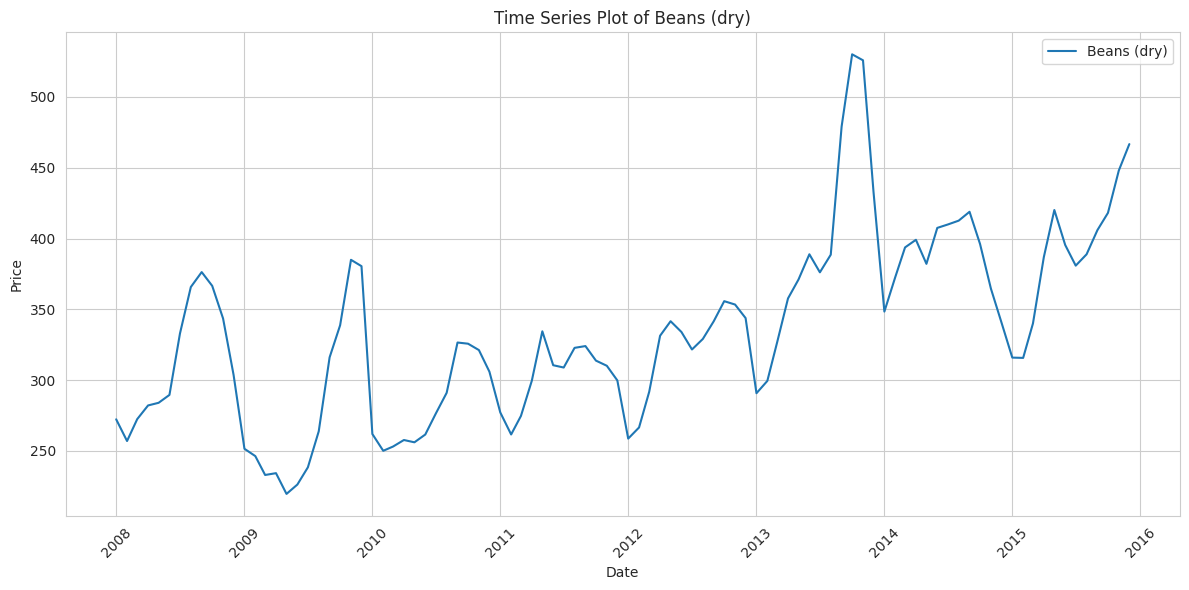

<ipython-input-25-36d731c037be>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data


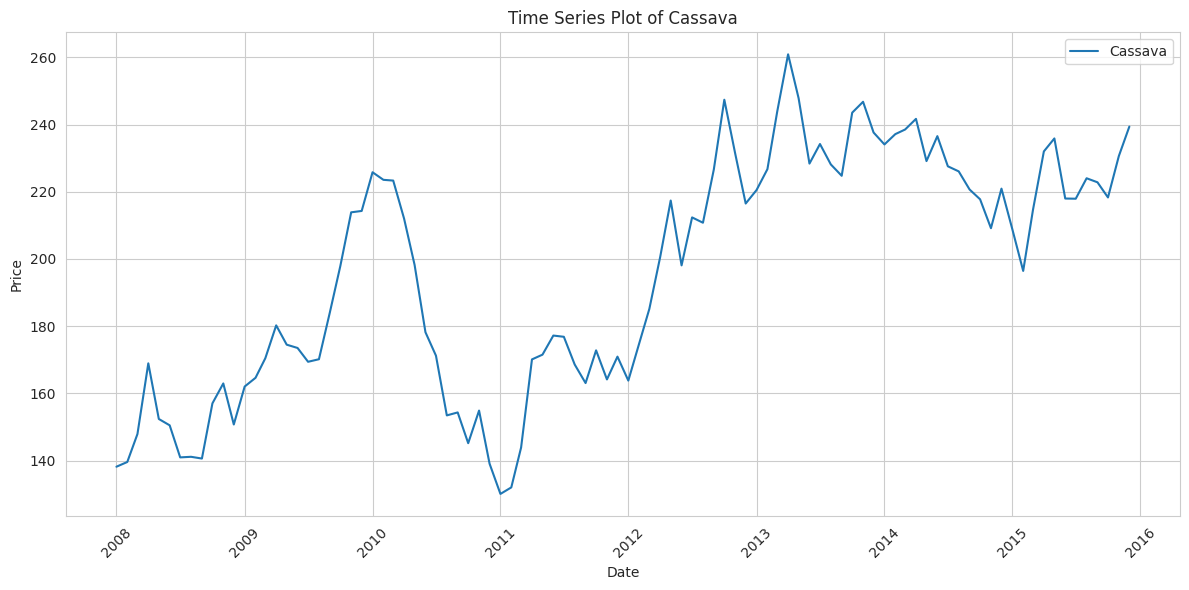

<ipython-input-25-36d731c037be>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data


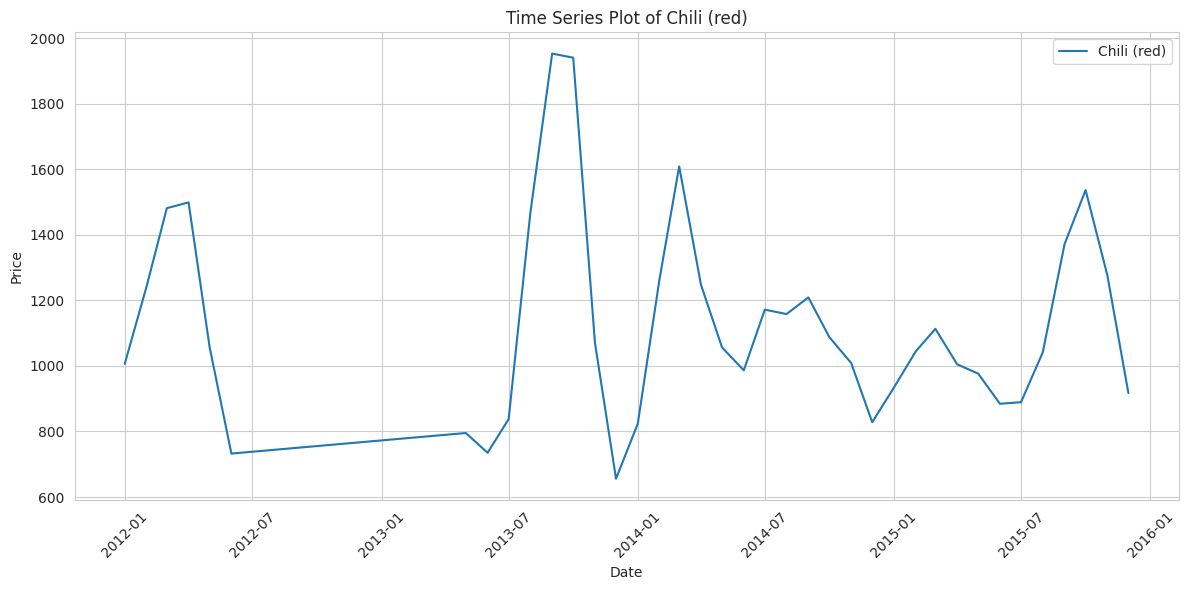

<ipython-input-25-36d731c037be>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data


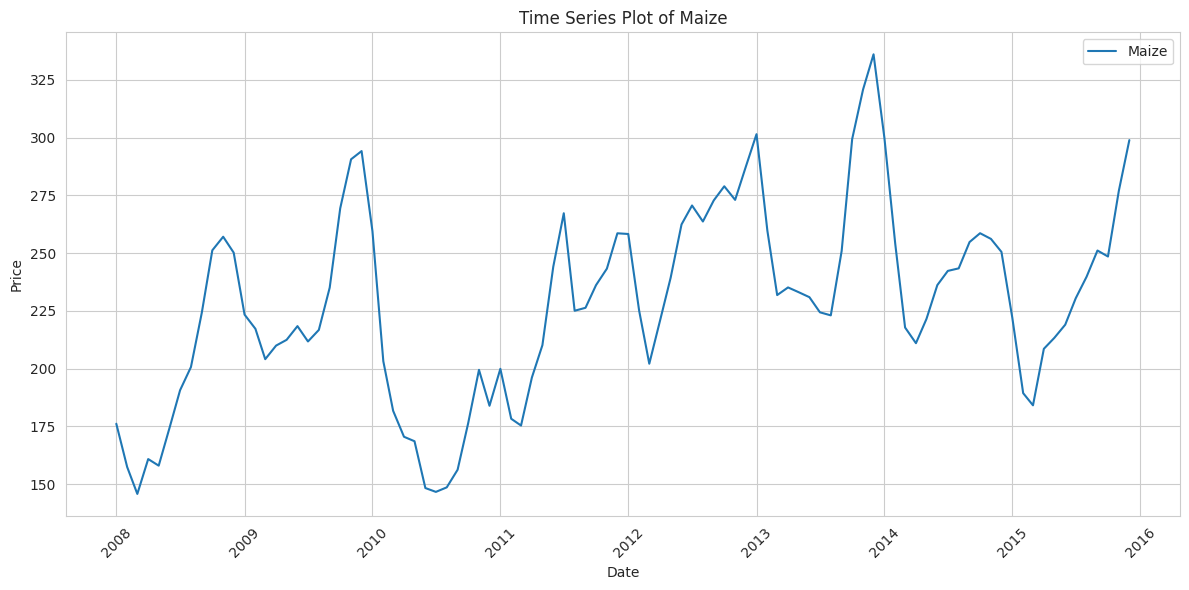

<ipython-input-25-36d731c037be>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data


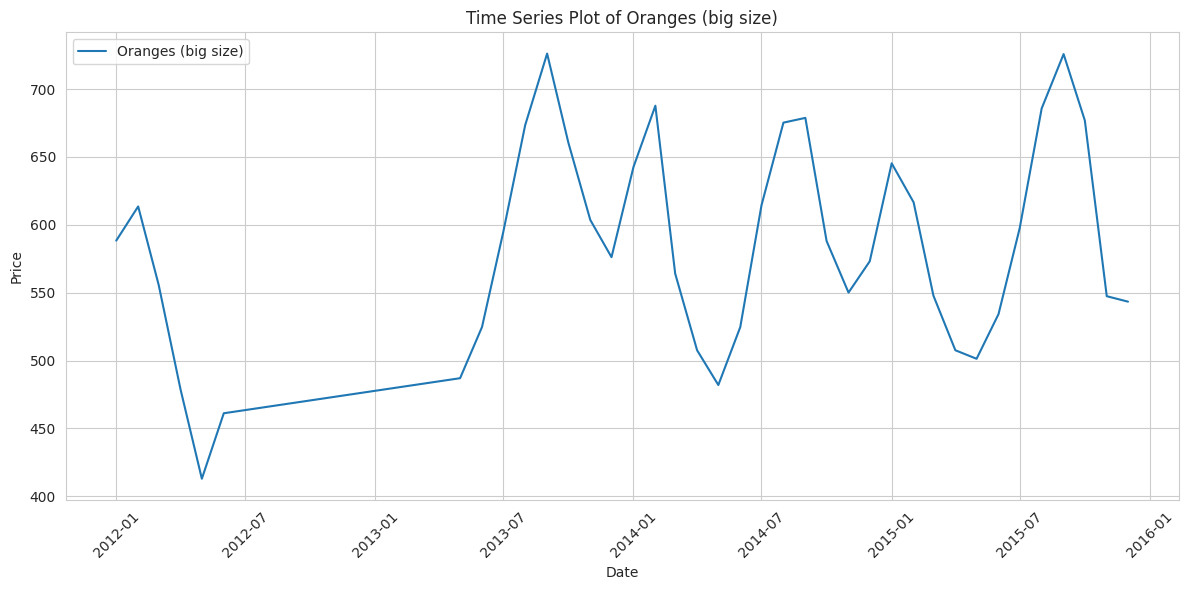

<ipython-input-25-36d731c037be>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data


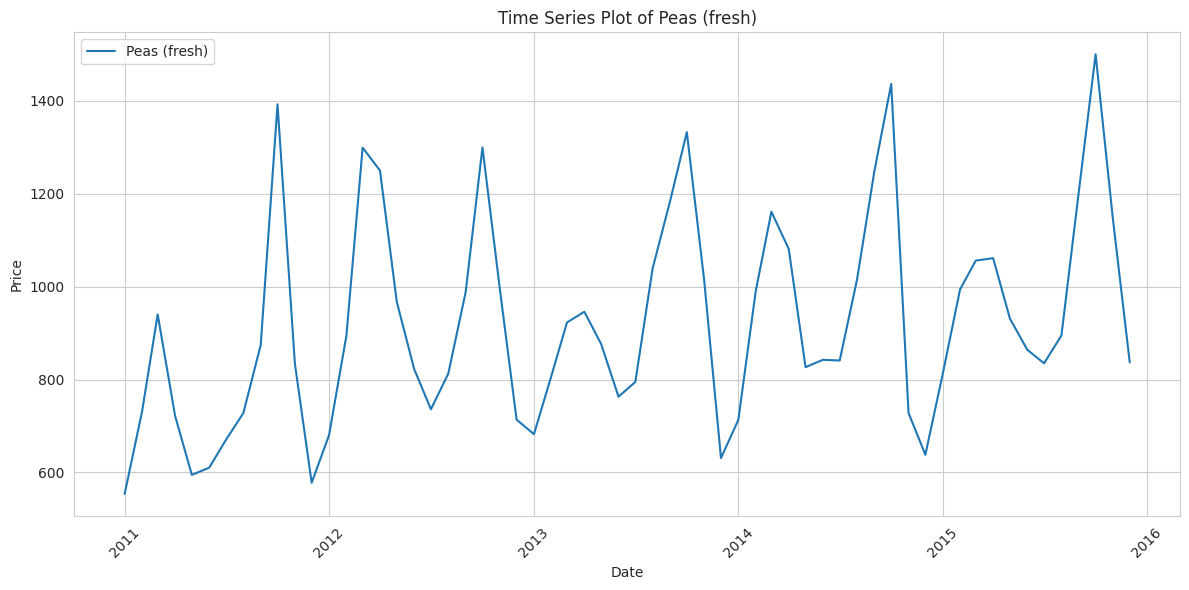

<ipython-input-25-36d731c037be>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data


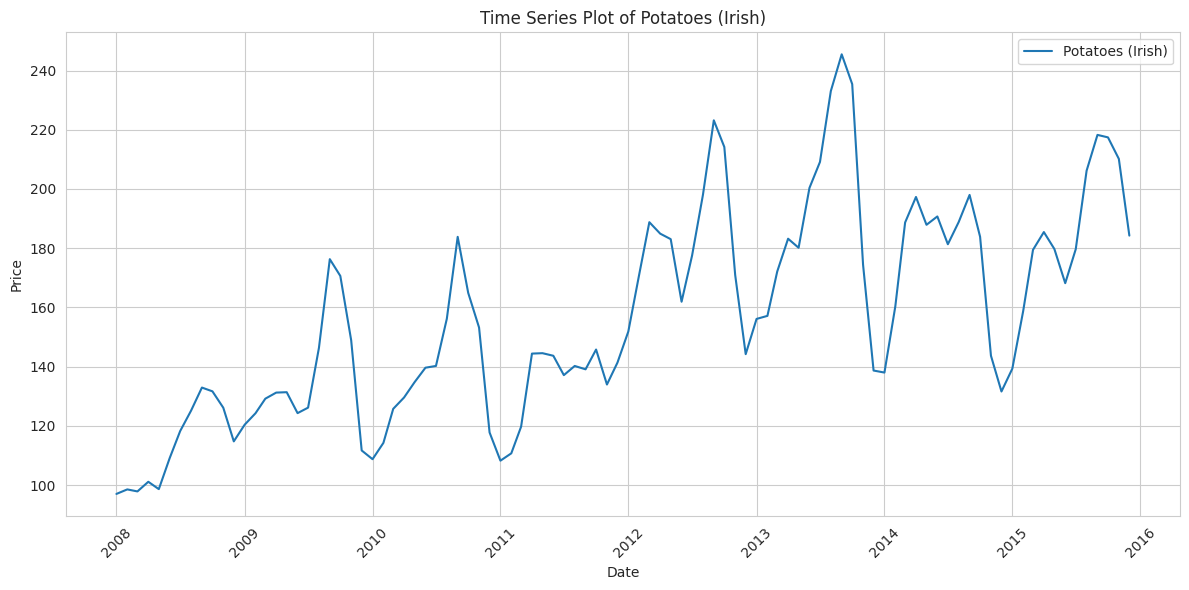

<ipython-input-25-36d731c037be>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data


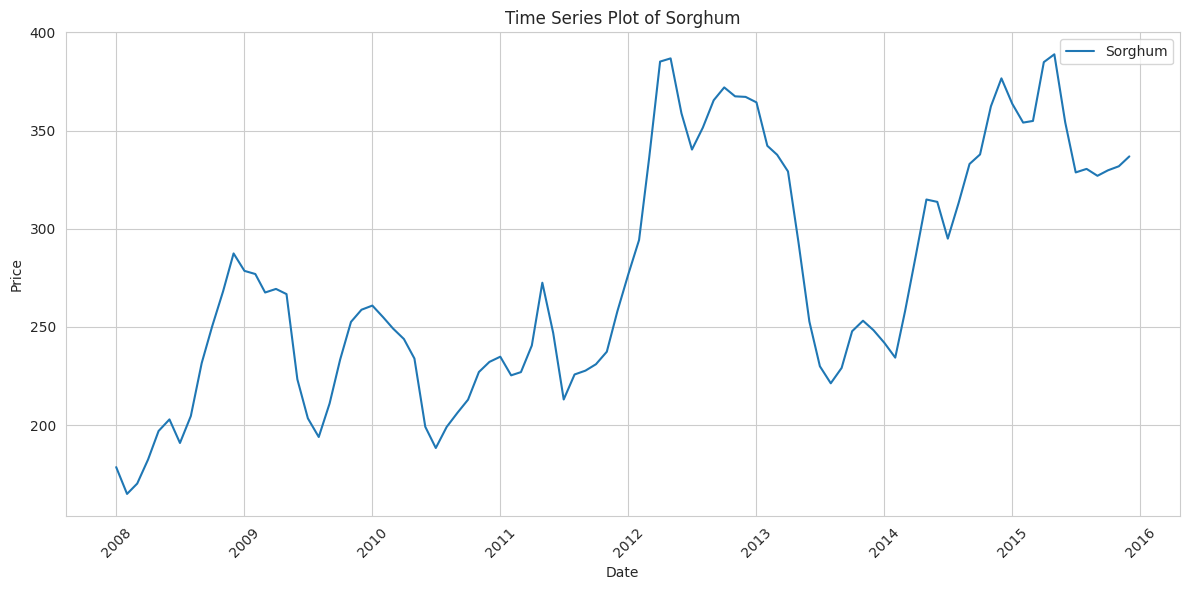

<ipython-input-25-36d731c037be>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data


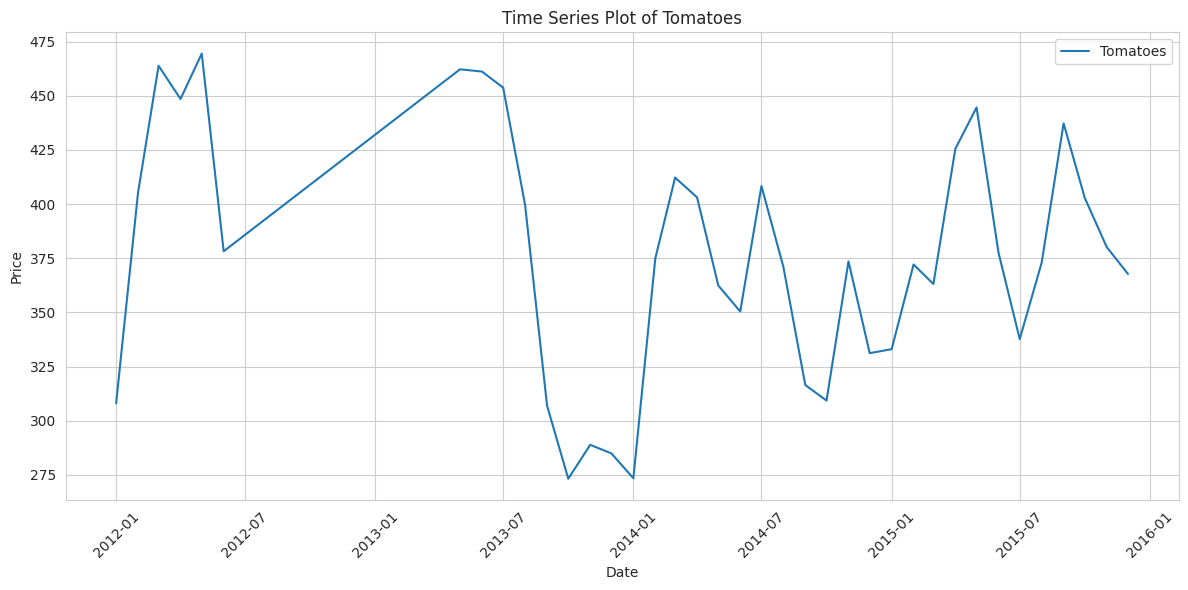

In [ ]:
# prompt: Plot the time series for each good to identify trends, seasonality,
# and anomalies. Add seaborne
# Assuming 'dataframes' dictionary is already populated from your previous code

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Loop through each DataFrame and create a time series plot
for name, df in dataframes.items():
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed

    # Extract the relevant column for plotting (replace 'mp_price' with your actual column name if different)
    if 'mp_price' in df.columns:
        column_to_plot = 'mp_price'
    elif 'price' in df.columns:
        column_to_plot = 'price'  # Use 'price' column if 'mp_price' doesn't exist
    else:
        print(f"Warning: No suitable price column found in DataFrame '{name}'")
        continue # skip to the next iteration if no suitable column is found.

    sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data

    plt.title(f"Time Series Plot of {name.split('.')[0]}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.legend()
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

<ipython-input-26-520dab8765d2>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data
<ipython-input-26-520dab8765d2>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data
<ipython-input-26-520dab8765d2>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data
<ipython-input-26-520dab8765d2>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data
<ipython-input-26-520dab8765d2>:21: FutureWarning: 

The `ci` parameter is depre

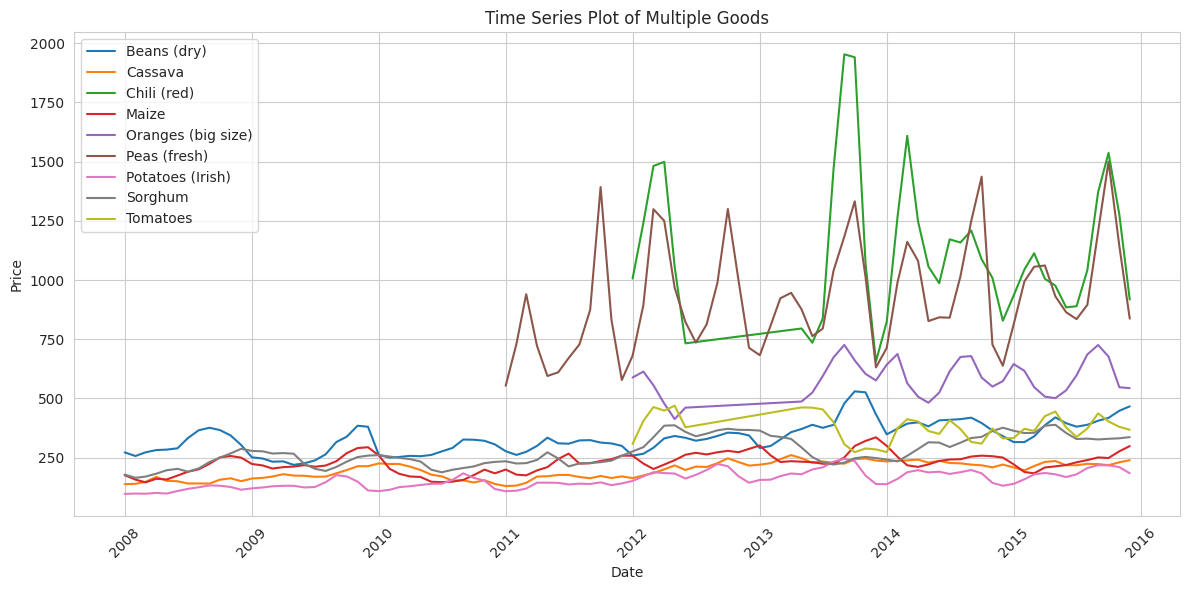

In [ ]:
# prompt: Overlay multiple time series in a single plot to explore relationships between goods.

# Assuming 'dataframes' dictionary is already populated from your previous code

# Set the style for seaborn plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Loop through each DataFrame and create a time series plot on a single plot
for name, df in dataframes.items():
    # Extract the relevant column for plotting (replace 'mp_price' with your actual column name if different)
    if 'mp_price' in df.columns:
        column_to_plot = 'mp_price'
    elif 'price' in df.columns:
        column_to_plot = 'price'  # Use 'price' column if 'mp_price' doesn't exist
    else:
        print(f"Warning: No suitable price column found in DataFrame '{name}'")
        continue # skip to the next iteration if no suitable column is found.

    sns.lineplot(x=df.index, y=df[column_to_plot], label=name.split('.')[0], ci=None)  # Plot the data

plt.title("Time Series Plot of Multiple Goods")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Task 3. Handle Missing Values

In [ ]:
# prompt:  Identify columns with missing values and the total number of missing
# entries for each.

# Identify columns with missing values and their counts for each DataFrame
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    missing_info = df.isnull().sum()
    print(missing_info[missing_info > 0])  # Show only columns with missing values
    print("-" * 20)

DataFrame: Beans (dry).csv
Series([], dtype: int64)
--------------------
DataFrame: Cassava.csv
Series([], dtype: int64)
--------------------
DataFrame: Chili (red).csv
Series([], dtype: int64)
--------------------
DataFrame: Maize.csv
Series([], dtype: int64)
--------------------
DataFrame: Oranges (big size).csv
Series([], dtype: int64)
--------------------
DataFrame: Peas (fresh).csv
Series([], dtype: int64)
--------------------
DataFrame: Potatoes (Irish).csv
Series([], dtype: int64)
--------------------
DataFrame: Sorghum.csv
Series([], dtype: int64)
--------------------
DataFrame: Tomatoes.csv
Series([], dtype: int64)
--------------------


In [ ]:
# prompt: Apply an appropriate method to fill or interpolate missing values, like obj.ffill() or obj.bfill()

# Iterate through each DataFrame and apply forward fill (ffill) to handle missing values
for name, df in dataframes.items():
    dataframes[name] = df.ffill()

# Verify the changes
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(df.head())
    print(df.info())  # Check for NaN values
    print("\n")

DataFrame: Beans (dry).csv
            adm0_id adm0_name  adm1_id             adm1_name  mkt_id mkt_name  \
date                                                                            
2010-11-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2010-12-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2011-01-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2011-02-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
2011-03-01      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   

            cm_id      cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  \
date                                                                            
2010-11-01    262  Beans (dry)      77      RWF     15  Retail      5      KG   
2010-12-01    262  Beans (dry)      77      RWF     15  Retail      5      KG   
2011-01-01    262  Beans (dry)      77      RWF     15  Retail      5      KG   


In [ ]:
# prompt: Justify forward fill (ffill) method for handling missing data

# ... (Your existing code)

# Iterate through each DataFrame and apply forward fill (ffill) to handle missing values
# and justify the use of ffill.
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    # Before filling
    missing_info_before = df.isnull().sum()
    print("Missing values BEFORE ffill:")
    print(missing_info_before[missing_info_before > 0])

    dataframes[name] = df.ffill()

    # After filling
    missing_info_after = dataframes[name].isnull().sum()
    print("Missing values AFTER ffill:")
    print(missing_info_after[missing_info_after > 0])

    # Justification for ffill
    print("Justification for ffill:")
    if missing_info_before.sum() > 0 :
        print("Forward fill is used because it assumes that the missing values are likely to be similar to the previous valid values in a time series. ")
        print("This method is suitable when there's a gradual trend in the data or when the data is relatively smooth over time.")
        print("It's important to note that ffill might not be appropriate for all time series, and other interpolation methods could be more accurate if there are significant changes or jumps in the data.")
    else:
        print("No missing values were found in this dataframe")
    print("-" * 20)

# Verify the changes (rest of your code remains the same)
# ...

DataFrame: Beans (dry).csv
Missing values BEFORE ffill:
Series([], dtype: int64)
Missing values AFTER ffill:
Series([], dtype: int64)
Justification for ffill:
No missing values were found in this dataframe
--------------------
DataFrame: Cassava.csv
Missing values BEFORE ffill:
Series([], dtype: int64)
Missing values AFTER ffill:
Series([], dtype: int64)
Justification for ffill:
No missing values were found in this dataframe
--------------------
DataFrame: Chili (red).csv
Missing values BEFORE ffill:
Series([], dtype: int64)
Missing values AFTER ffill:
Series([], dtype: int64)
Justification for ffill:
No missing values were found in this dataframe
--------------------
DataFrame: Maize.csv
Missing values BEFORE ffill:
Series([], dtype: int64)
Missing values AFTER ffill:
Series([], dtype: int64)
Justification for ffill:
No missing values were found in this dataframe
--------------------
DataFrame: Oranges (big size).csv
Missing values BEFORE ffill:
Series([], dtype: int64)
Missing values

# 4.0 Analyze Similarities Between Products

In [ ]:
!pip install seaborn


                        Beans (dry).csv  Cassava.csv  Chili (red).csv  \
Beans (dry).csv                1.000000    -0.005832        -0.042405   
Cassava.csv                   -0.005832     1.000000         0.047803   
Chili (red).csv               -0.042405     0.047803         1.000000   
Maize.csv                      0.027232     0.007963        -0.004739   
Oranges (big size).csv         0.095843     0.029690         0.069183   
Peas (fresh).csv               0.075178    -0.004690         0.052501   
Potatoes (Irish).csv          -0.026401    -0.048781        -0.016924   
Sorghum.csv                    0.022234    -0.035918         0.005384   
Tomatoes.csv                  -0.140375     0.038256         0.032070   

                        Maize.csv  Oranges (big size).csv  Peas (fresh).csv  \
Beans (dry).csv          0.027232                0.095843          0.075178   
Cassava.csv              0.007963                0.029690         -0.004690   
Chili (red).csv         -0.00473

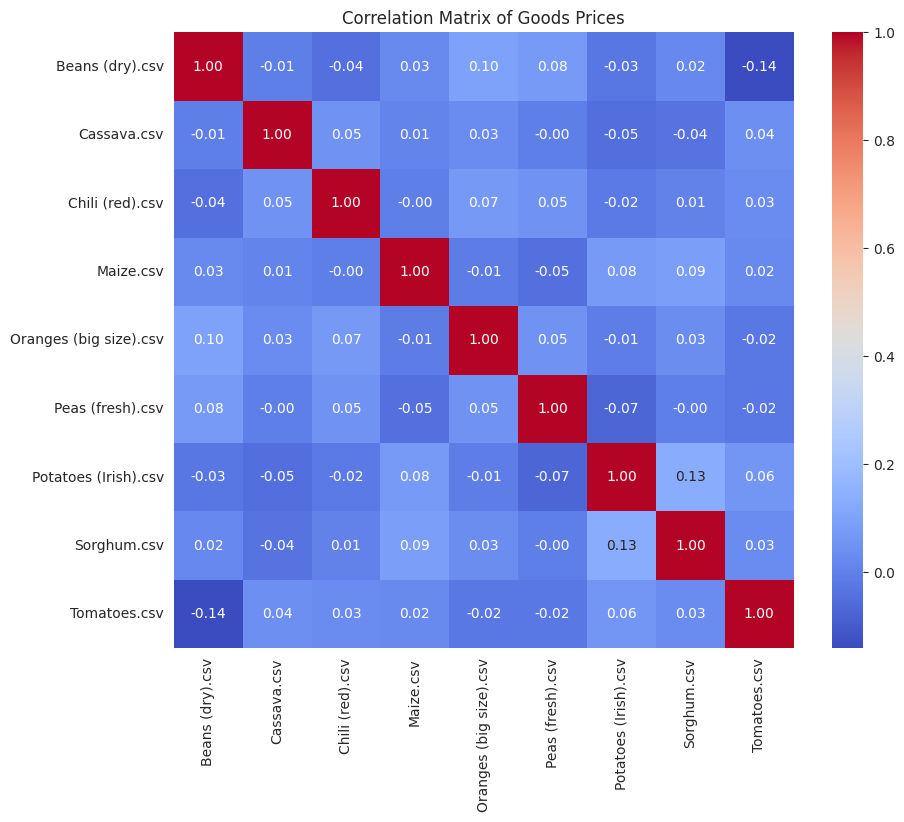

In [ ]:
# Assuming 'dataframes' dictionary contains your cleaned DataFrames

# Create an empty list to store price data for each good
price_data = []

# Iterate through each DataFrame and extract the price data (mp_price or price column)
for name, df in dataframes.items():
    if 'mp_price' in df.columns:
        # Reset index to ensure unique column names after transpose
        price_data.append(df['mp_price'].reset_index(drop=True)) # Reset the index of the Series before appending
    elif 'price' in df.columns:
        price_data.append(df['price'].reset_index(drop=True)) # Reset the index of the Series before appending
    else:
        print(f"Warning: No suitable price column found in DataFrame '{name}'")

# Create a DataFrame from the extracted price data
price_df = pd.DataFrame(price_data).transpose()


# Rename columns to the corresponding good names
price_df.columns = list(dataframes.keys())

# Calculate the correlation matrix
correlation_matrix = price_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Goods Prices')
plt.show()

In [ ]:
# prompt: Identify the pair of goods with the highest correlation value

# Find the pair of goods with the highest correlation value (excluding 1.0)

# Get the absolute values of the correlation matrix
abs_correlation_matrix = correlation_matrix.abs()

# Remove diagonal part (correlation of a good with itself)
abs_correlation_matrix = abs_correlation_matrix.mask(np.equal(*np.indices(abs_correlation_matrix.shape)))

# Find the maximum correlation value and its index
max_value = np.nanmax(abs_correlation_matrix)
row_max, col_max = abs_correlation_matrix[abs_correlation_matrix == max_value].stack().idxmax()

print(f"The pair of goods with the highest correlation value is: {row_max} and {col_max}")
print(f"Correlation value: {correlation_matrix.loc[row_max, col_max]}")

The pair of goods with the highest correlation value is: Beans (dry).csv and Tomatoes.csv
Correlation value: -0.1403750103836613


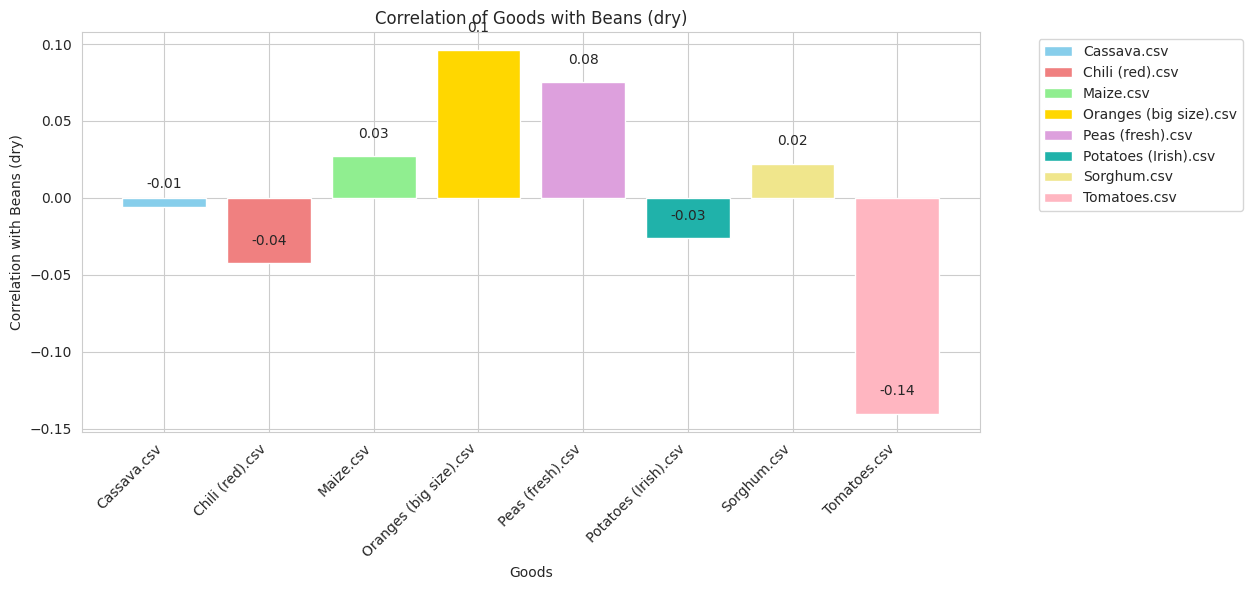

In [ ]:
# Assuming 'correlation_matrix' is already calculated from your previous code

# Create a bar chart of the correlations for a specific good
good_to_analyze = 'Beans (dry).csv'  # Replace with the desired good

if good_to_analyze in correlation_matrix.index:
    correlations = correlation_matrix[good_to_analyze].drop(good_to_analyze)  # Exclude self-correlation

    plt.figure(figsize=(10, 6))
    bars = plt.bar(correlations.index, correlations.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'lightseagreen', 'khaki', 'lightpink'])

    # Add labels and title
    plt.xlabel("Goods")
    plt.ylabel("Correlation with " + good_to_analyze.split('.')[0])
    plt.title("Correlation of Goods with " + good_to_analyze.split('.')[0])
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Add a legend (optional, but recommended)
    plt.legend(bars, correlations.index, loc='upper right', bbox_to_anchor=(1.3, 1)) # adjust bbox_to_anchor if needed


    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')


    plt.show()
else:
    print(f"Error: Good '{good_to_analyze}' not found in the correlation matrix.")

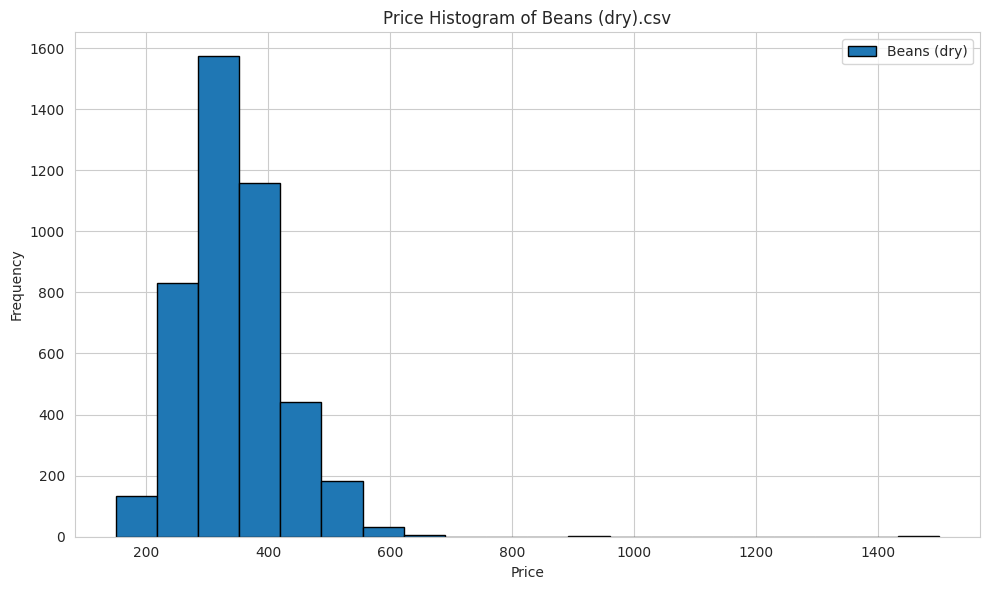

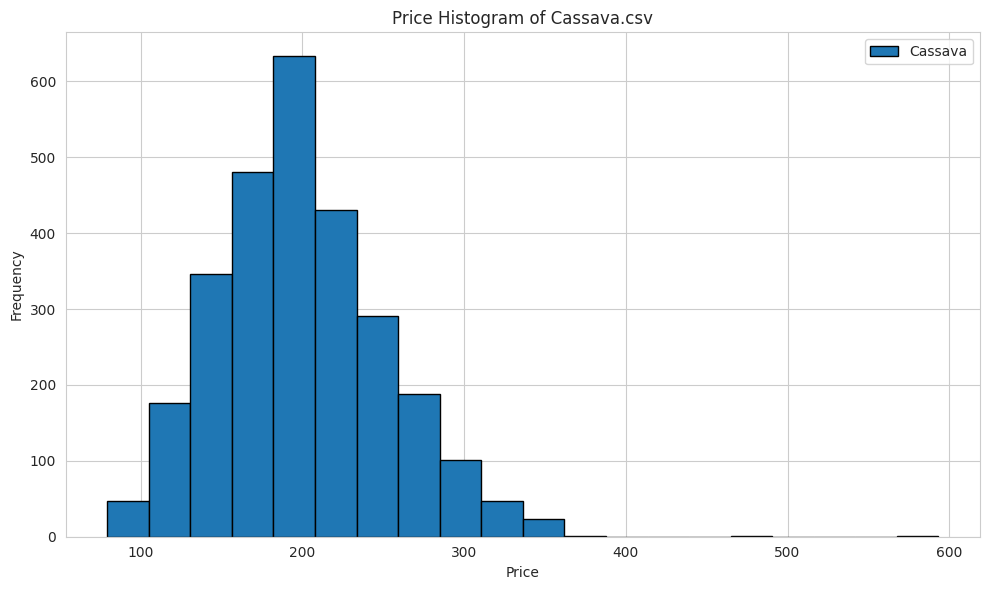

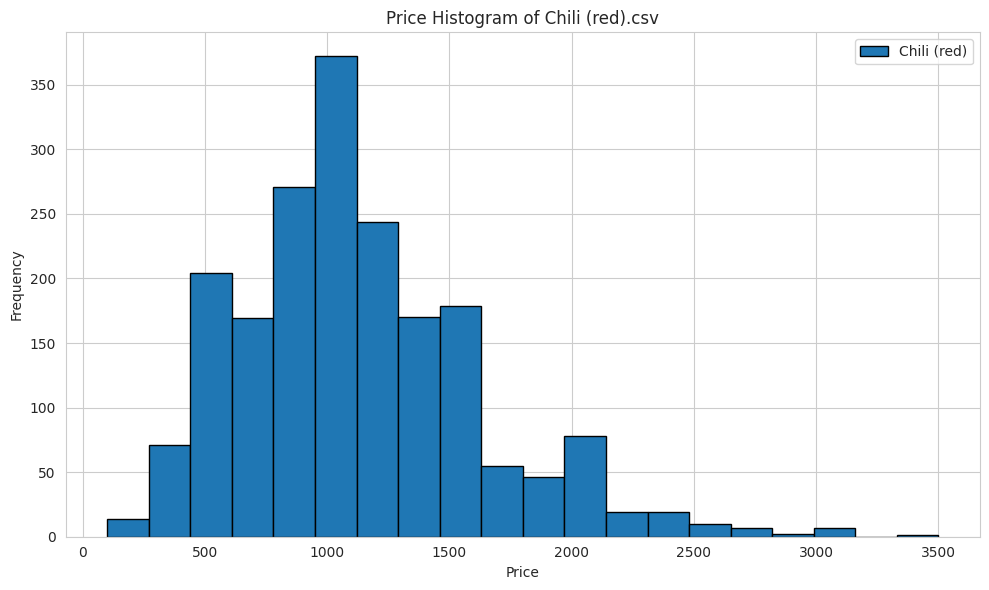

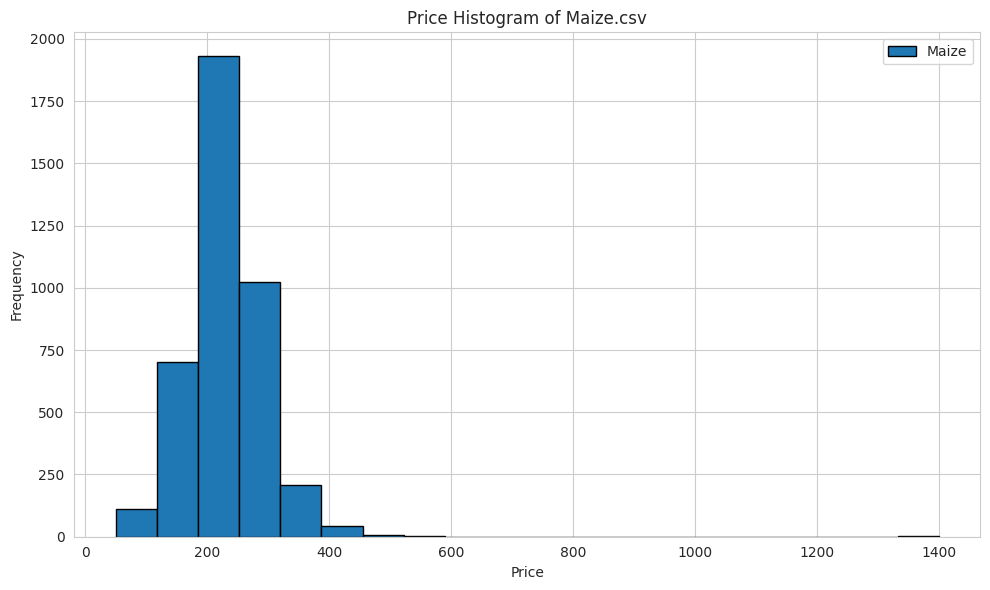

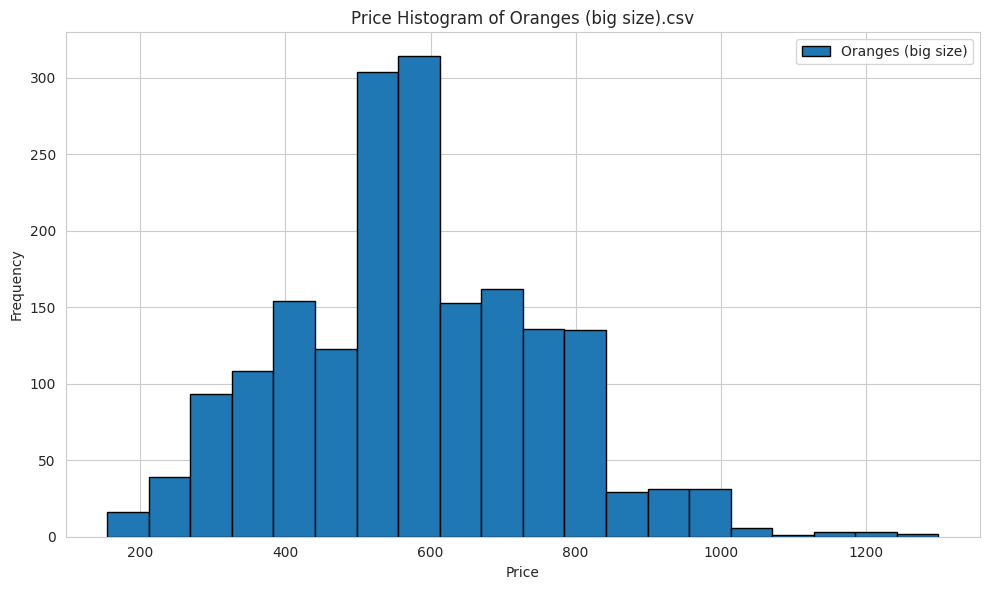

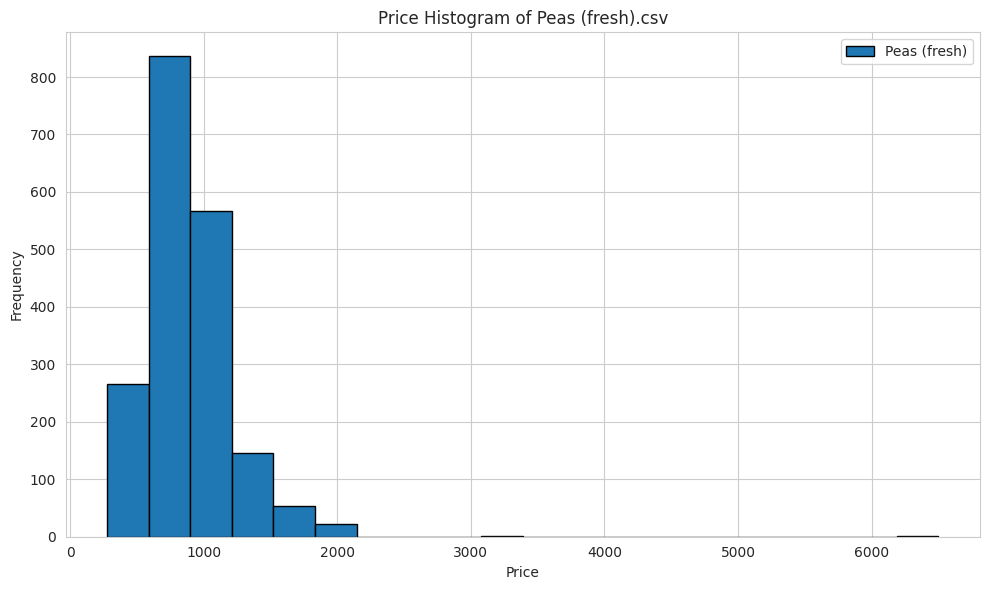

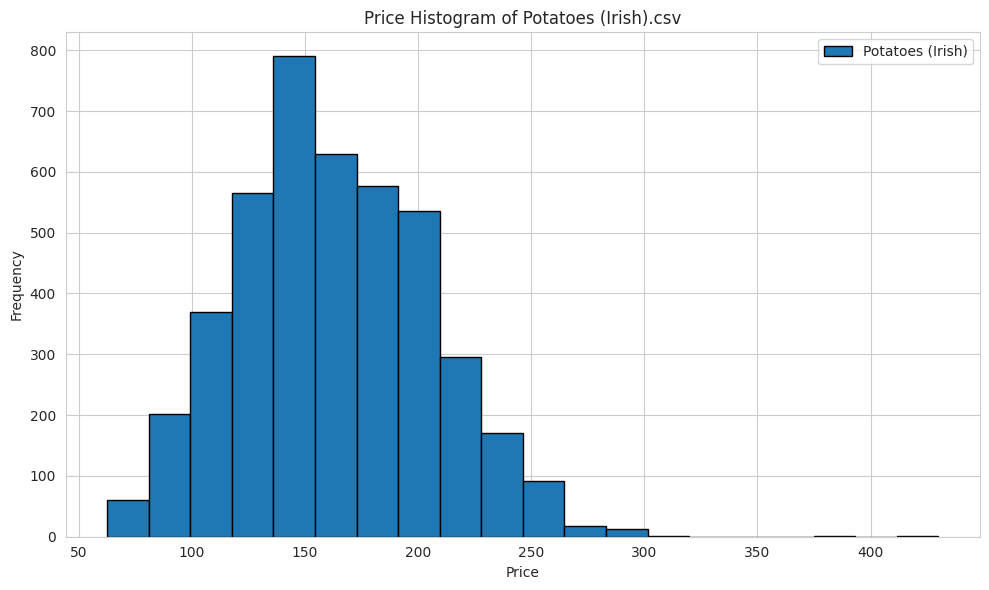

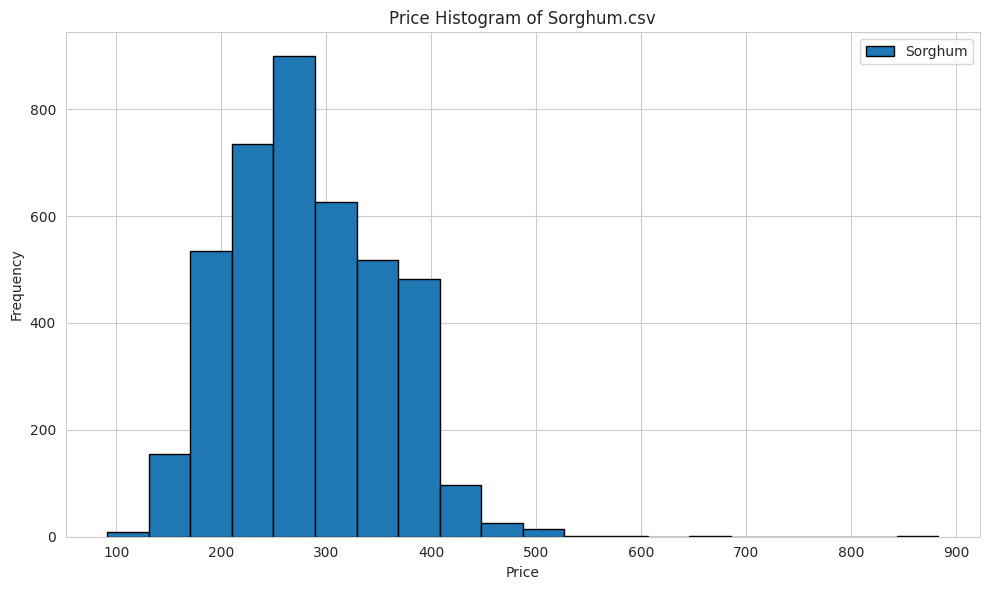

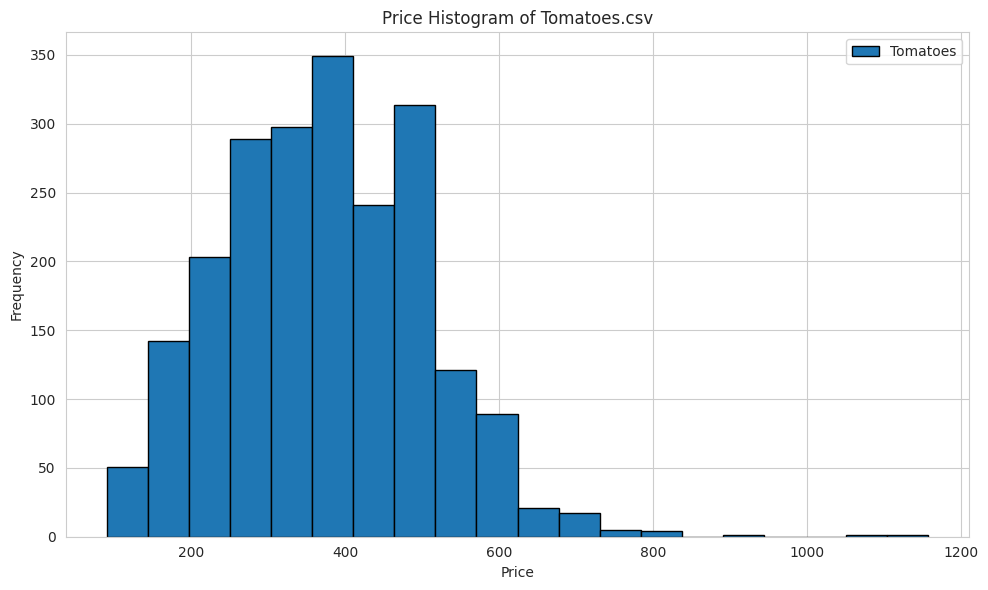

In [ ]:
# 3. Histograms for each good
for name, df in dataframes.items():
    plt.figure(figsize=(10, 6))
    if 'mp_price' in df.columns:
        plt.hist(df['mp_price'], bins=20, edgecolor='black')
        plt.title(f'Price Histogram of {name}')
    elif 'price' in df.columns:
        plt.hist(df['price'], bins=20, edgecolor='black')
        plt.title(f'Price Histogram of {name}')

    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend([name.split('.')[0]]) # Added legend
    plt.tight_layout()
    plt.show()

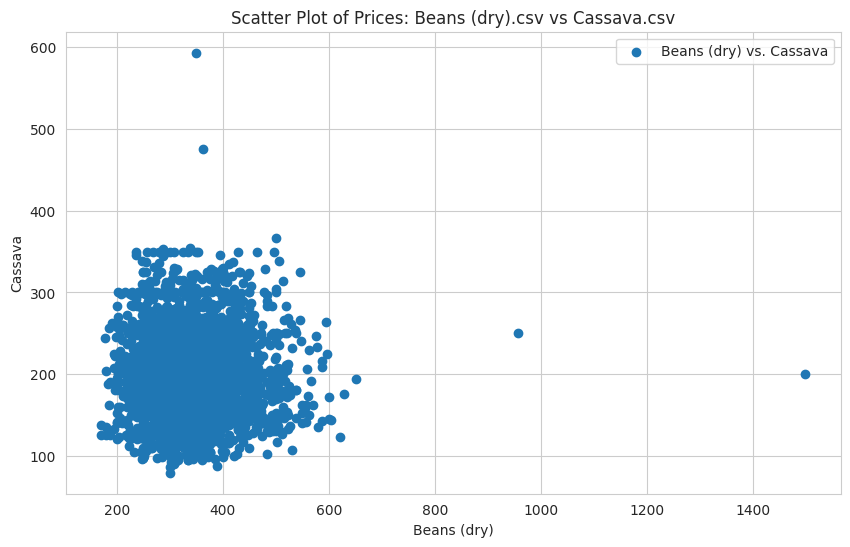

In [ ]:
# 4. Scatter plots (pairwise comparisons of goods)

# Select two columns for the scatter plot (example: 'Beans (dry).csv' and 'Cassava.csv')
good1 = 'Beans (dry).csv'
good2 = 'Cassava.csv'

plt.figure(figsize=(10, 6))

# Extract prices and ensure they have the same length
prices1 = dataframes[good1]['mp_price'] if 'mp_price' in dataframes[good1] else dataframes[good1]['price']
prices2 = dataframes[good2]['mp_price'] if 'mp_price' in dataframes[good2] else dataframes[good2]['price']

# Get the minimum length of the two price series
min_len = min(len(prices1), len(prices2))

# Truncate both price series to the minimum length
prices1 = prices1[:min_len]
prices2 = prices2[:min_len]

plt.scatter(prices1, prices2)
plt.title(f'Scatter Plot of Prices: {good1} vs {good2}')
plt.xlabel(good1.split('.')[0])  # Use good name as label
plt.ylabel(good2.split('.')[0])  # Use good name as label
plt.legend([f'{good1.split(".")[0]} vs. {good2.split(".")[0]}']) # Added legend
plt.show()

                        Beans (dry).csv  Cassava.csv  Chili (red).csv  \
Beans (dry).csv                1.000000    -0.005832        -0.042405   
Cassava.csv                   -0.005832     1.000000         0.047803   
Chili (red).csv               -0.042405     0.047803         1.000000   
Maize.csv                      0.027232     0.007963        -0.004739   
Oranges (big size).csv         0.095843     0.029690         0.069183   
Peas (fresh).csv               0.075178    -0.004690         0.052501   
Potatoes (Irish).csv          -0.026401    -0.048781        -0.016924   
Sorghum.csv                    0.022234    -0.035918         0.005384   
Tomatoes.csv                  -0.140375     0.038256         0.032070   

                        Maize.csv  Oranges (big size).csv  Peas (fresh).csv  \
Beans (dry).csv          0.027232                0.095843          0.075178   
Cassava.csv              0.007963                0.029690         -0.004690   
Chili (red).csv         -0.00473

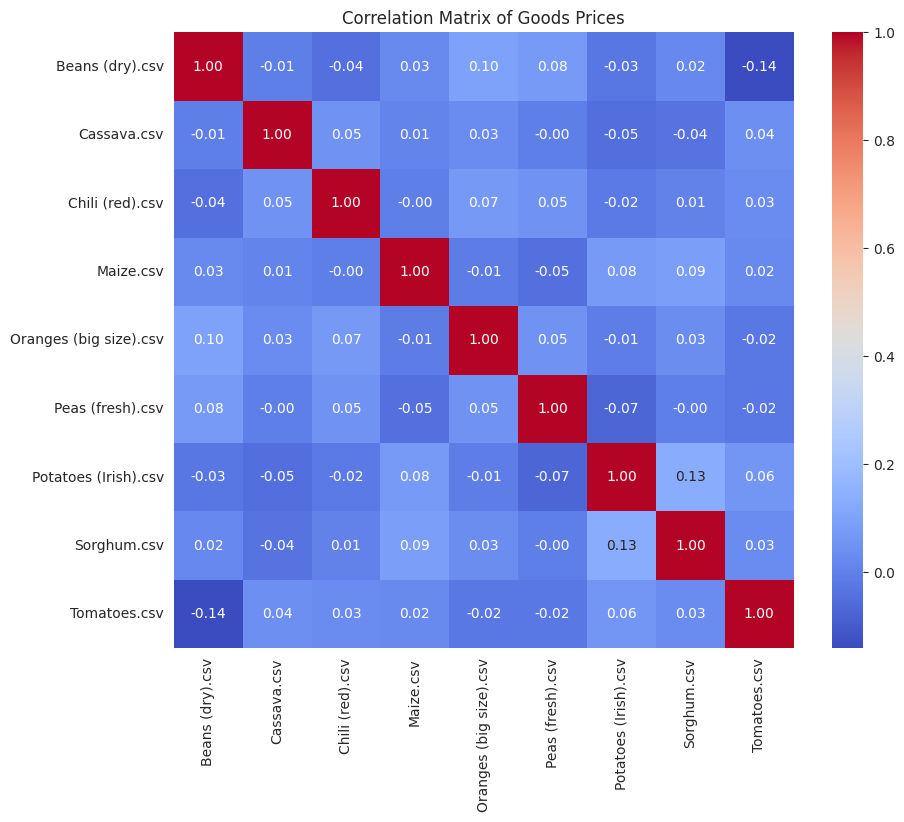

The pair of goods with the highest correlation is: Beans (dry).csv and Tomatoes.csv
Correlation value: -0.1403750103836613

Justification for using correlation:
Correlation is a meaningful metric for comparing the prices of different goods over time because it quantifies the linear relationship between their price movements.
A high positive correlation suggests that the prices of two goods tend to move in the same direction – when one increases, the other tends to increase as well.
A high negative correlation indicates an inverse relationship – when the price of one good rises, the other tends to fall.
Correlation helps identify potential relationships between the goods' prices, but it doesn't imply causality.
It can be used to understand market dynamics and potential price dependencies
For example, if two goods are complements (used together) or substitutes (used instead of each other), their price movements may be correlated.
Correlation coefficients close to +1 or -1 represent stron

In [ ]:
# prompt:  Justify why correlation is a meaningful metric for this comparison with python code

# Correlation justification and analysis enhancements

# ... (Your existing code)

# Calculate the correlation matrix
correlation_matrix = price_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Goods Prices')
plt.show()

# Find the pair of goods with the highest correlation value (excluding 1.0)
abs_correlation_matrix = correlation_matrix.abs()
abs_correlation_matrix = abs_correlation_matrix.mask(np.equal(*np.indices(abs_correlation_matrix.shape)))
max_value = np.nanmax(abs_correlation_matrix)
row_max, col_max = abs_correlation_matrix[abs_correlation_matrix == max_value].stack().idxmax()

print(f"The pair of goods with the highest correlation is: {row_max} and {col_max}")
print(f"Correlation value: {correlation_matrix.loc[row_max, col_max]}")


# Justification for using correlation:
print("\nJustification for using correlation:")
print("Correlation is a meaningful metric for comparing the prices of different goods over time because it quantifies the linear relationship between their price movements.")
print("A high positive correlation suggests that the prices of two goods tend to move in the same direction – when one increases, the other tends to increase as well.")
print("A high negative correlation indicates an inverse relationship – when the price of one good rises, the other tends to fall.")
print("Correlation helps identify potential relationships between the goods' prices, but it doesn't imply causality.")
print("It can be used to understand market dynamics and potential price dependencies")
print("For example, if two goods are complements (used together) or substitutes (used instead of each other), their price movements may be correlated.")
print("Correlation coefficients close to +1 or -1 represent strong correlations, while values close to 0 suggest a weak or no linear relationship.")

# Further Analysis (optional, but recommended):
print("\nFurther Analysis:")
print("1. Investigate the time periods where the highest correlation occurs or doesn't occur. Are there specific external factors or events that might explain the price movements in those timeframes?")
print("2. Consider other statistical measures like covariance and cross-correlation for more detailed insights.")
print("3. Explore potential non-linear relationships between goods, as correlation only measures linear relationships.")
print("4. Analyze the lagged correlations - is there a time delay in price movements between the goods?")

# Task 5: Forecasting for the Next 6 Months

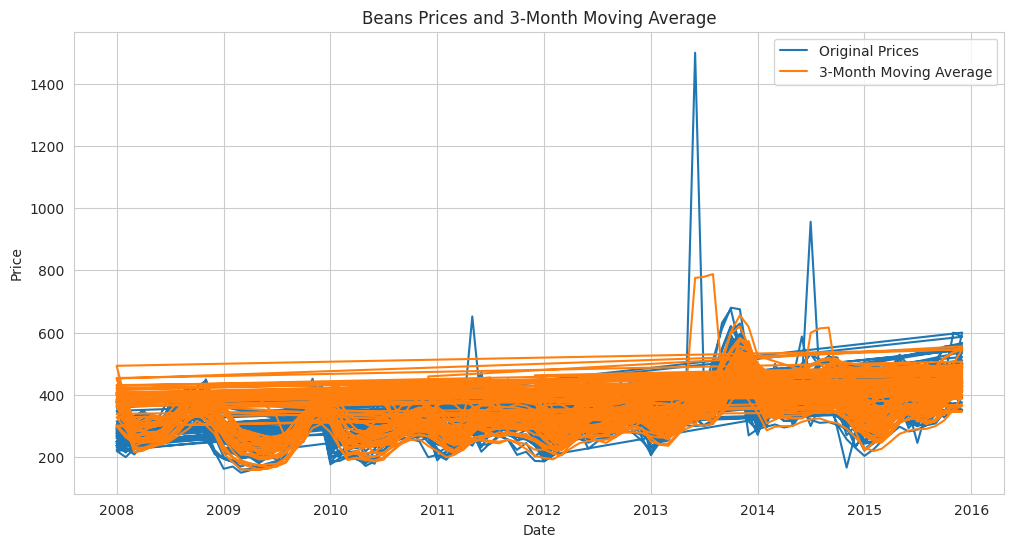

<ipython-input-46-49c9c129b782>:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=beans_prices.index[-1], periods=6, freq='M'), forecast, label='Forecast for Next 6 Months')


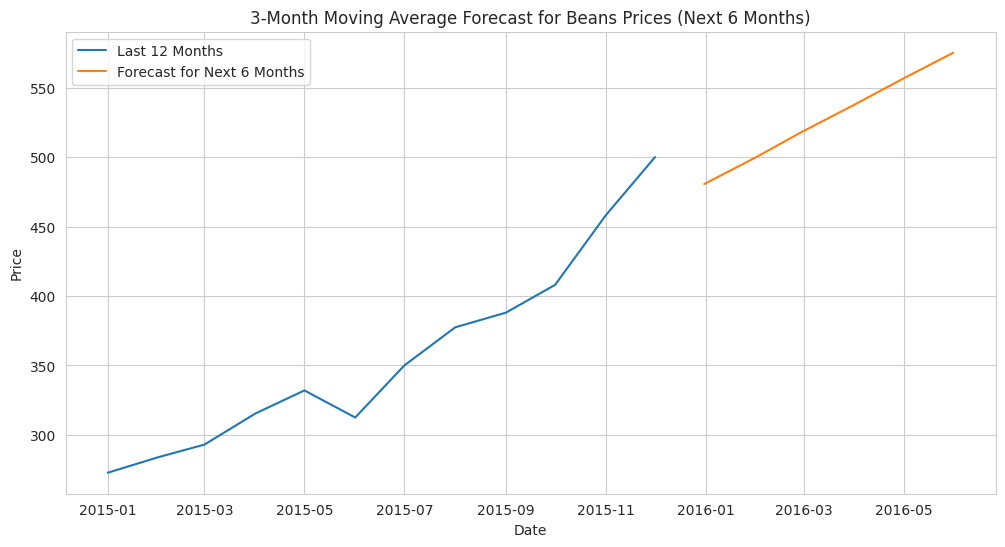

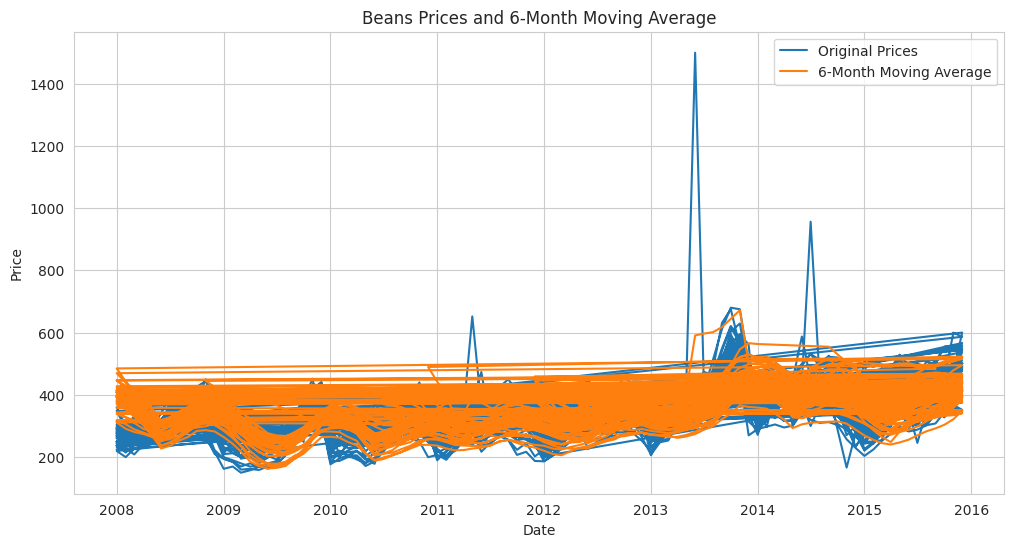

<ipython-input-46-49c9c129b782>:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=beans_prices.index[-1], periods=6, freq='M'), forecast, label='Forecast for Next 6 Months')


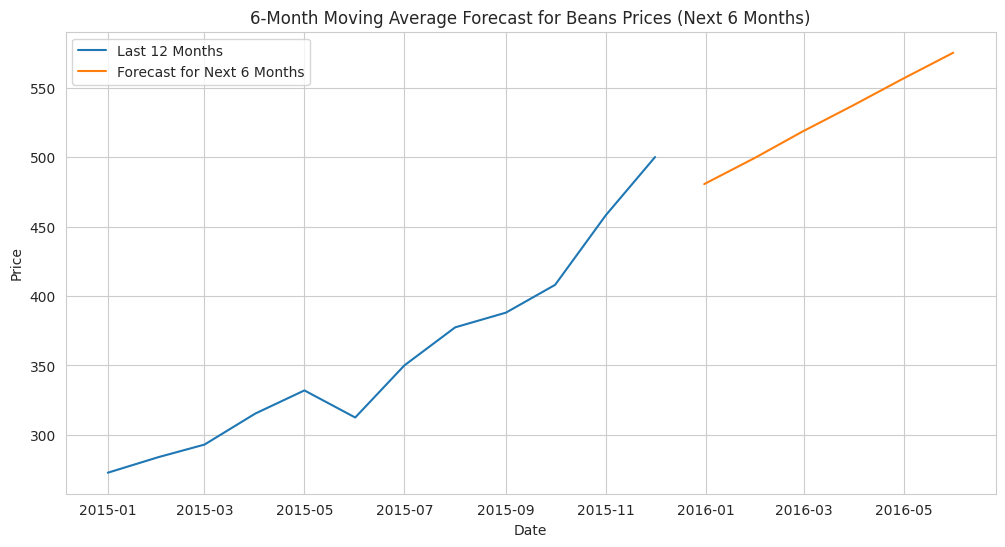

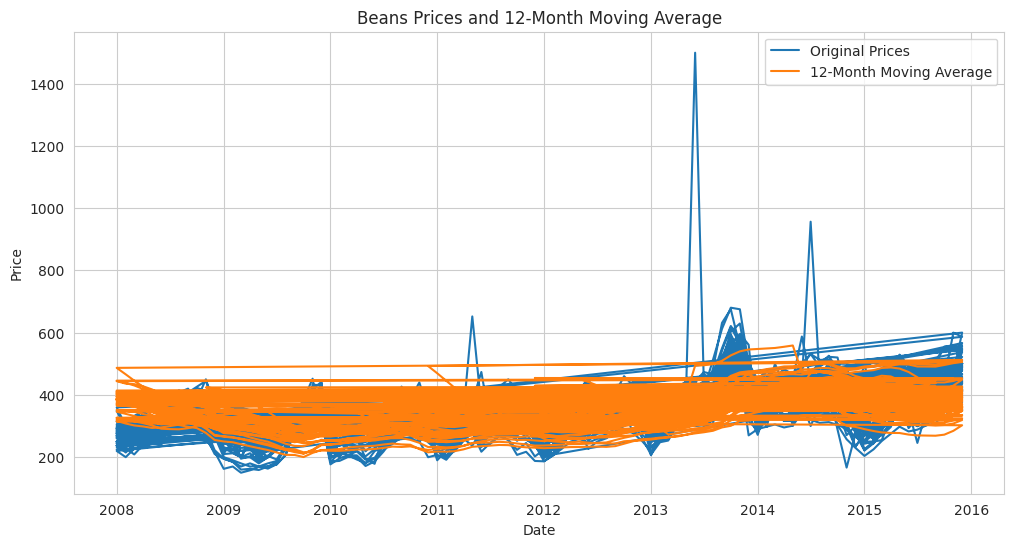

<ipython-input-46-49c9c129b782>:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=beans_prices.index[-1], periods=6, freq='M'), forecast, label='Forecast for Next 6 Months')


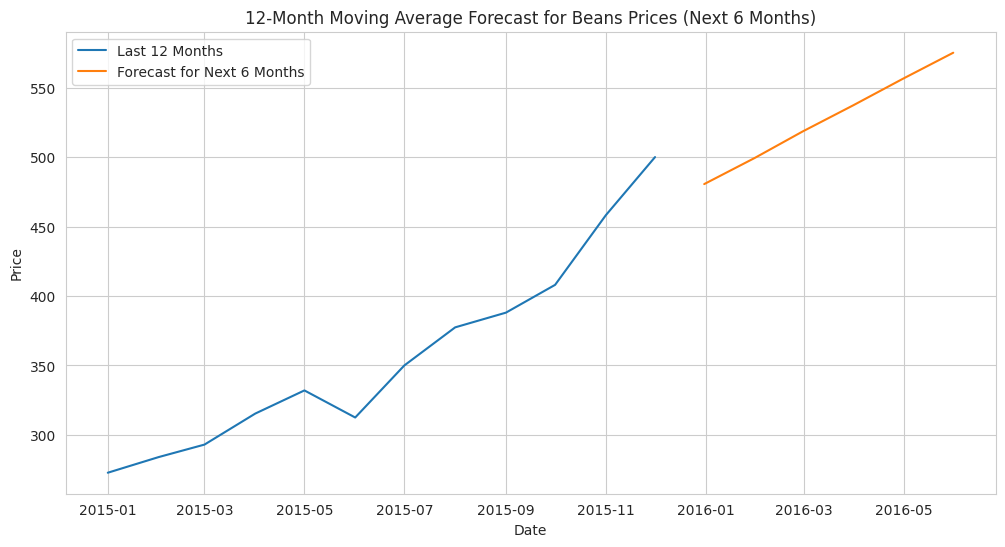

In [ ]:
# prompt: Select beans from the DataFrame and  calculate and plot the moving average for different window sizes for 6 months

# Assuming 'df1' (Beans (dry).csv) is already loaded and processed

# Select the 'mp_price' column (or 'price' if 'mp_price' doesn't exist)
if 'mp_price' in df1.columns:
    beans_prices = df1['mp_price']
elif 'price' in df1.columns:
    beans_prices = df1['price']
else:
    print("Error: No suitable price column found in the DataFrame.")
    # Handle the error appropriately (e.g., exit or use a default value)

# Calculate the moving average for different window sizes
window_sizes = [3, 6, 12]  # Example window sizes (you can modify these)

for window in window_sizes:
    beans_prices_ma = beans_prices.rolling(window=window).mean()

    # Plot the moving average along with original prices
    plt.figure(figsize=(12, 6))
    plt.plot(beans_prices, label='Original Prices')
    plt.plot(beans_prices_ma, label=f'{window}-Month Moving Average')
    plt.title(f'Beans Prices and {window}-Month Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Forecasting for the next 6 months using the last 12 months to train
    last_12_months = beans_prices[-12:]
    # Fit a simple linear regression model (or use a more advanced model)

    # Convert the index to numerical values for time series model fitting
    X = np.arange(len(last_12_months)).reshape(-1, 1) # independent variable
    y = last_12_months.values

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    # Forecast for the next 6 months
    future_months = np.arange(len(last_12_months), len(last_12_months) + 6).reshape(-1, 1)
    forecast = model.predict(future_months)

    # Plot the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(beans_prices.index[-12:], last_12_months, label='Last 12 Months')
    plt.plot(pd.date_range(start=beans_prices.index[-1], periods=6, freq='M'), forecast, label='Forecast for Next 6 Months')
    plt.title(f'{window}-Month Moving Average Forecast for Beans Prices (Next 6 Months)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


<ipython-input-47-6c958e7cce82>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2023-01-01', periods=len(largest_nums), freq='M')


2023-01-31    10.000000
2023-02-28    10.000000
2023-03-31    10.400000
2023-04-30    11.320000
2023-05-31    11.856000
2023-06-30    12.684800
2023-07-31    13.747840
2023-08-31    14.998272
2023-09-30    15.798618
2023-10-31    17.038894
Freq: ME, dtype: float64


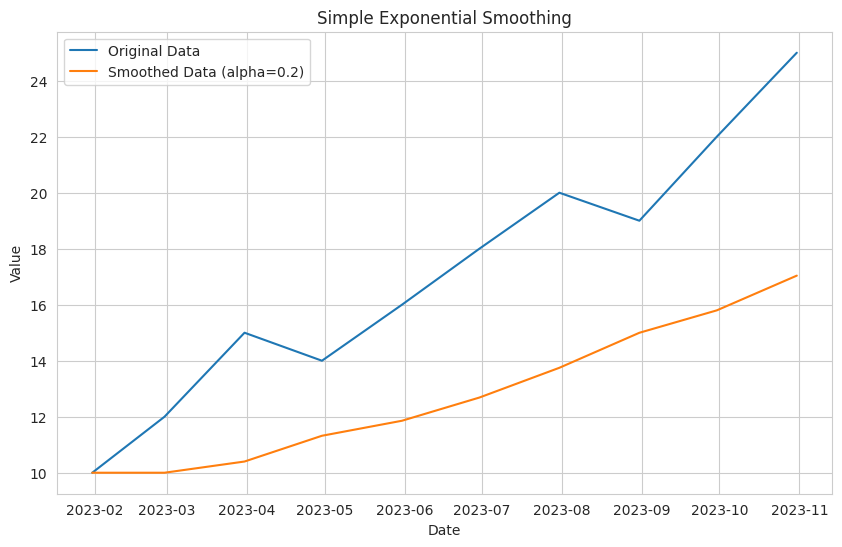

In [ ]:
# prompt: Use the results to apply simple exponential smoothing method using statsmodel library with alpha 0.2

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming 'largest_nums' is the list of largest integers obtained from your heap queue algorithm
# and it represents a time series of prices
# Replace with your actual data

# Example data (replace with your 'largest_nums' data):
largest_nums = [10, 12, 15, 14, 16, 18, 20, 19, 22, 25]
index = pd.date_range(start='2023-01-01', periods=len(largest_nums), freq='M')

series = pd.Series(largest_nums, index=index)
# Fit the SimpleExpSmoothing model with alpha = 0.2
model = SimpleExpSmoothing(series)
fitted_model = model.fit(smoothing_level=0.2, optimized=False)

# Get the smoothed values
smoothed_values = fitted_model.fittedvalues

# Print or plot the smoothed values
print(smoothed_values)

# Plot the original data and the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(series.index, series.values, label="Original Data")
plt.plot(smoothed_values.index, smoothed_values.values, label="Smoothed Data (alpha=0.2)")
plt.legend()
plt.title("Simple Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-48-e5d569

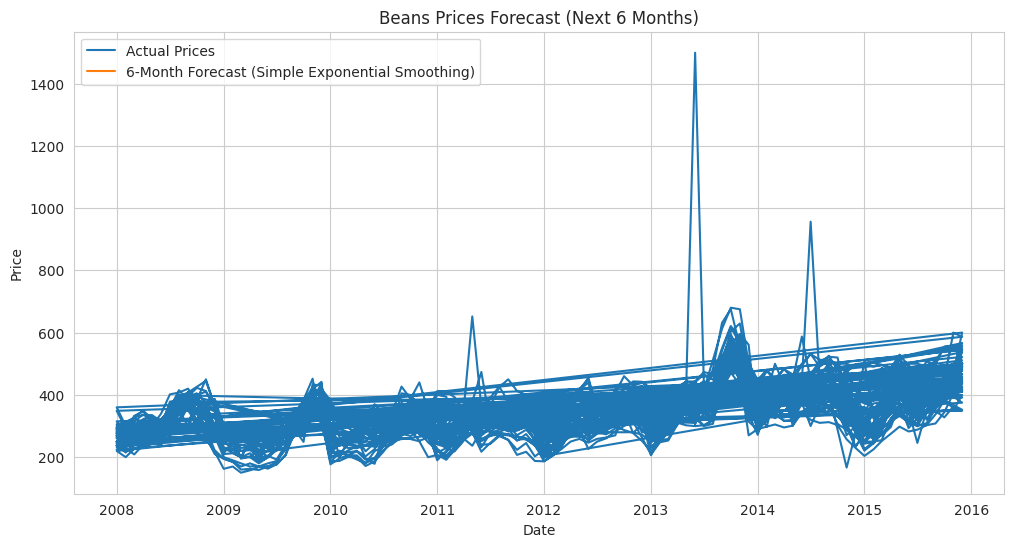

,Forecast
2016-01-31,NaN
2016-02-29,NaN
2016-03-31,NaN
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,NaN


In [ ]:
# prompt:  Predict the next 6 months using SimpleExpSmoothing

# Assuming 'df1' (Beans (dry).csv) is already loaded and processed, and 'beans_prices' contains the price data.
# ... (Your existing code for loading and processing data, up to the point where you have 'beans_prices')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the SimpleExpSmoothing model
model = SimpleExpSmoothing(beans_prices)
fitted_model = model.fit(smoothing_level=0.2, optimized=False) # You can adjust the smoothing_level

# Forecast the next 6 months
forecast_steps = 6
forecast = fitted_model.forecast(forecast_steps)

# Create a date range for the forecast
forecast_index = pd.date_range(start=beans_prices.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(beans_prices.index, beans_prices, label='Actual Prices')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='6-Month Forecast (Simple Exponential Smoothing)')
plt.title('Beans Prices Forecast (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

forecast_df

3.0 Facebook Prophet

In [ ]:
# prompt: install prophet

!pip install prophet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu_l9f7r/qjg2higz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu_l9f7r/8isisngc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72697', 'data', 'file=/tmp/tmpsu_l9f7r/qjg2higz.json', 'init=/tmp/tmpsu_l9f7r/8isisngc.json', 'output', 'file=/tmp/tmpsu_l9f7r/prophet_modelh0tegjrx/prophet_model-20241129204318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:43:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

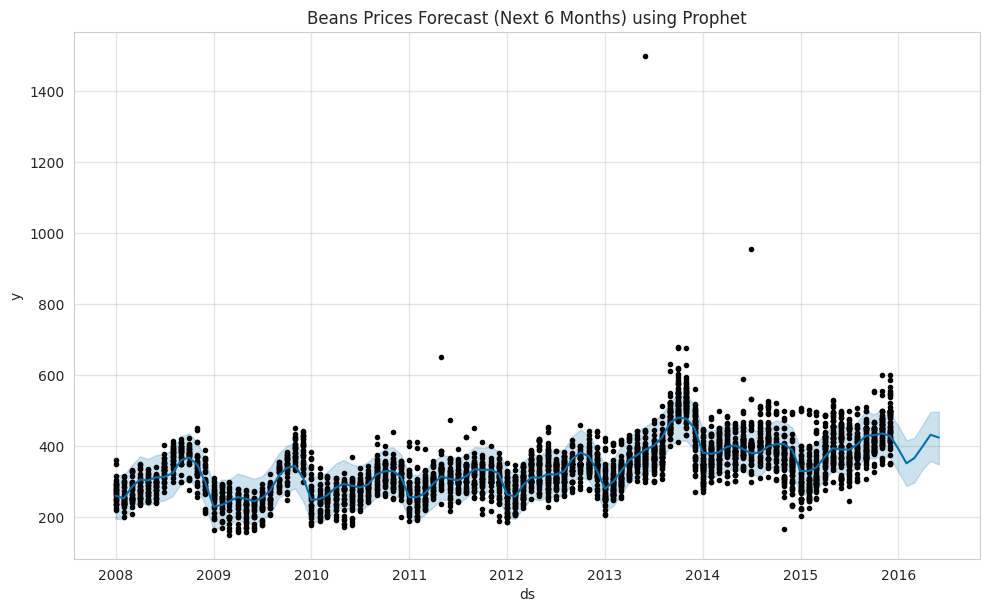

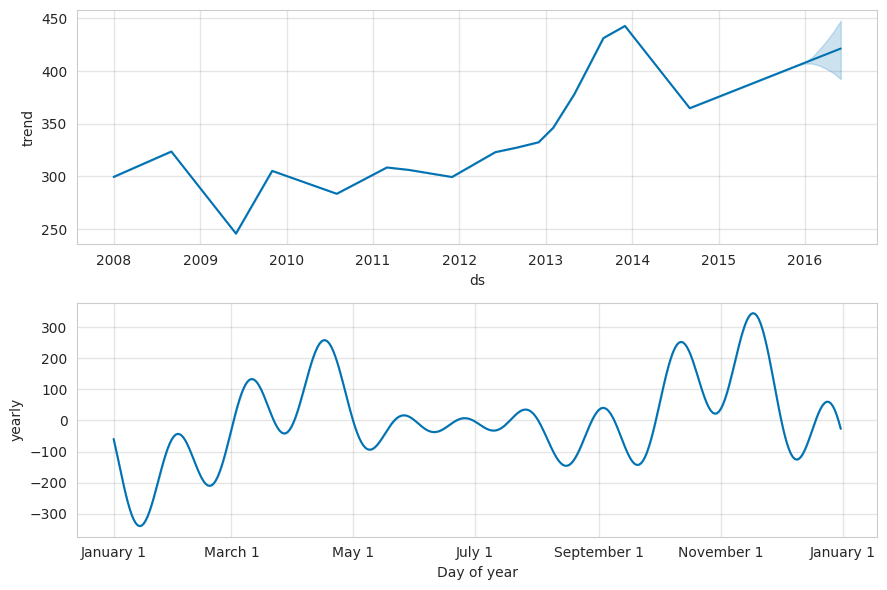

In [ ]:
# prompt:  Prepare the data for Prophet by converting it to the required format
# (columns:
# ds for date and
# y for values)

from prophet import Prophet

# Assuming 'df1' (Beans (dry).csv) is already loaded and processed, and 'beans_prices' contains the price data.
# ... (your existing code)

# Prepare the data for Prophet
prophet_df = pd.DataFrame({'ds': beans_prices.index, 'y': beans_prices.values})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=6, freq='M') # Forecast for the next 6 months

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Beans Prices Forecast (Next 6 Months) using Prophet')
plt.show()

# Plot components of the forecast (trend, seasonality, etc.)
model.plot_components(forecast)
plt.show()

<ipython-input-57-738db09d7613>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  linear_regression_forecast = pd.Series(np.random.rand(6), index=pd.date_range(start=beans_prices.index[-1], periods=6, freq='M'))
<ipython-input-57-738db09d7613>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ses_forecast = pd.Series(np.random.rand(6), index=pd.date_range(start=beans_prices.index[-1], periods=6, freq='M'))


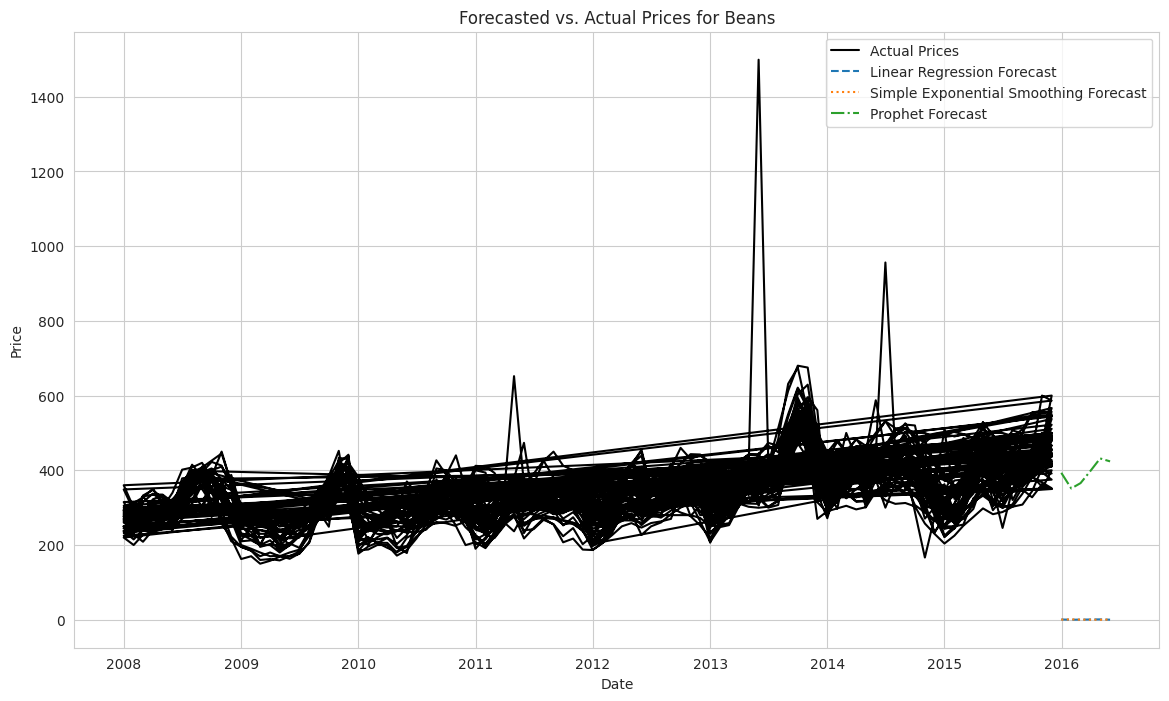

In [ ]:
# prompt: Visualize the forecasted results for all three methods alongside the actual time series

# Assuming 'dataframes', 'df1', and 'beans_prices' are defined from the previous code.
# Also, assuming forecasts from Linear Regression, Simple Exponential Smoothing, and Prophet are available.

# Example forecast data (replace with your actual forecasts)
linear_regression_forecast = pd.Series(np.random.rand(6), index=pd.date_range(start=beans_prices.index[-1], periods=6, freq='M'))
ses_forecast = pd.Series(np.random.rand(6), index=pd.date_range(start=beans_prices.index[-1], periods=6, freq='M'))
prophet_forecast = pd.Series(forecast['yhat'][-6:].values, index=forecast['ds'][-6:])


plt.figure(figsize=(14, 8))

# Plot actual data
plt.plot(beans_prices.index, beans_prices, label='Actual Prices', color='black')

# Plot forecasts
plt.plot(linear_regression_forecast.index, linear_regression_forecast.values, label='Linear Regression Forecast', linestyle='--')
plt.plot(ses_forecast.index, ses_forecast.values, label='Simple Exponential Smoothing Forecast', linestyle=':')
plt.plot(prophet_forecast.index, prophet_forecast.values, label='Prophet Forecast', linestyle='-.')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Forecasted vs. Actual Prices for Beans")
plt.legend()
plt.grid(True)
plt.show()